# Outline/Purpose:

The overall purpose of this project is to train a machine learning model on the assumed email data to forecast if an email is spam or not spam, and to pick the best preferred model for this classification task.


1.	Pre-process the data: Clean the data-set and eliminate any irrelevant information. As our data is already in numerical arrangement converting it was not essential.
2.	Training the models: This step includes splitting our data set into Training data and Test data. Ultimately ‘Train’ several supervised classification models such as KNN, SVM, Naive Bayes, Decision Trees, Random Forest, and Logistic Regression using the pre-processed data.
3.	Appraise the models: Assess the performance of the models via metrics such as accuracy, precision, recall, and F1-score.
4.	Elect the best and least preferred models: Based on the evaluation, choose the best model that provides the highest accuracy and has the best overall performance.



In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report



In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
#Read csv file into a dataframe
import io 
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

# Load and Preprocess the data:
Below code will load the data from the csv file into a pandas dataframe, remove the first column which is the email number, replace all non-numeric characters with NaN values, fill the missing values with 0, convert the data into integer type, and store it as dataframe named 'df'.

In [4]:
# Load the data from csv file into a pandas dataframe
#df = pd.read_csv("./data.csv")

# Remove the first column (Email name) as it is not relevant for the prediction
df = df.drop(columns=['Email No.'])

# Replace non-numeric characters with NaN values
df = df.replace(r'[^\d.]+', value=float('nan'), regex=True)

# Fill missing values with 0
df.fillna(0, inplace=True)

# Convert the data into integer type
df = df.astype(int)
df

,Prediction,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,0,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,0,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,0,1,0
5169,1,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
5170,1,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
low_cols = [col for col in df.columns[1:] if df[col].sum() <= 50]
low_count = len(low_cols)
low_count 

815

In [6]:
#Drop the low count columns from the df (3002 original columns - 815 dropped = 2187 columns)
new_df = df.copy()
for col in new_df.columns:
    if col in low_cols:
        del new_df[col]
new_df.head()

,Prediction,the,to,ect,and,for,of,a,you,hou,...,del,trial,ended,fall,hate,plain,jay,valued,lay,ff
0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,0,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,0,0,1


# Training the Models 

Splitting our Data Set into Training Data and Test Data

(https://stackoverflow.com/questions/56311638/how-how-iloc-1-works-can-any-one-explain-1-params)

In [7]:
# Split the data into features (X) and labels (y)
# X = new_df.iloc[:, :-1].values
# y = new_df.iloc[:, -1].values
y = new_df['Prediction'].values
X = new_df.drop('Prediction', axis=1).values

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Defining Array for 'Results'

In [9]:
# Define a dictionary to store the results of each model
results = {}

# Building a Machine Learning KNN Model

What is K-Nearest Neighbour? It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements. The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'

In [10]:
# Train KNN model
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

# Predict the target values for test set
y_pred_KNN = model_KNN.predict(X_test)

# Evaluate the KNN model
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN,average='macro',zero_division=0)
recall_KNN = recall_score(y_test, y_pred_KNN,average='macro',zero_division=0)
f1_KNN = f1_score(y_test, y_pred_KNN,average='macro',zero_division=0)

# Store the results of KNN model in the dictionary
results["KNN"] = {"accuracy": accuracy_KNN, 
                  "precision": precision_KNN, 
                  "recall": recall_KNN, 
                  "f1_score": f1_KNN
                 }
print(results["KNN"])

{'accuracy': 0.8521739130434782, 'precision': 0.8117335990190067, 'recall': 0.8425263157894737, 'f1_score': 0.8240165631469979}


# Building a Machine Learning SVM Model

What is SVM Model? Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples

In [11]:
# Train SVM model
model_SVM = SVC()
model_SVM.fit(X_train, y_train)

# Predict the target values for test set
y_pred_SVM = model_SVM.predict(X_test)

# Evaluate the SVM model
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
precision_SVM = precision_score(y_test, y_pred_SVM,average='macro',zero_division=0)
recall_SVM = recall_score(y_test, y_pred_SVM,average='macro',zero_division=0)
f1_SVM = f1_score(y_test, y_pred_SVM,average='macro',zero_division=0)

# Store the results of SVM model in the dictionary
results["SVM"] = {"accuracy": accuracy_SVM, 
                  "precision": precision_SVM, 
                  "recall": recall_SVM, 
                  "f1_score": f1_SVM
                 }
print(results["SVM"])

{'accuracy': 0.7951690821256039, 'precision': 0.8001954056731864, 'recall': 0.6530877192982456, 'f1_score': 0.6739983121961656}


# Building a Machine Learning Naive Bayes  Model
What is Naive Bayes  Model? Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set.

In [12]:
# Train Naive Bayes model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

# Predict the target values for test set
y_pred_NB = model_NB.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
precision_NB = precision_score(y_test, y_pred_NB,average='macro',zero_division=0)
recall_NB = recall_score(y_test, y_pred_NB,average='macro',zero_division=0)
f1_NB = f1_score(y_test, y_pred_NB,average='macro',zero_division=0)

# Store the results of Naive Bayes model in the dictionary
results["Naive Bayes"] = {"accuracy": accuracy_NB, 
                          "precision": precision_NB, 
                          "recall": recall_NB, 
                          "f1_score": f1_NB
                         }
print(results["Naive Bayes"])

{'accuracy': 0.9458937198067633, 'precision': 0.9217855203936884, 'recall': 0.9507017543859648, 'f1_score': 0.9345427933829044}


# Building a Machine Learning Decision Tree Model
What is Decision Tree Model? Decision trees are an approach used in supervised machine learning, a technique which uses labelled input and output datasets to train models. The approach is used mainly to solve classification problems, which is the use of a model to categorise or classify an object

In [13]:
# Train Decision Tree model
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

# Predict the target values for test set
y_pred_DT = model_DT.predict(X_test)

# Evaluate the Decision Tree model
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT,average='macro',zero_division=0)
recall_DT = recall_score(y_test, y_pred_DT,average='macro',zero_division=0)
f1_DT = f1_score(y_test, y_pred_DT,average='macro',zero_division=0)

# Store the results of Decision Tree model in the dictionary
results["Decision Tree"] = {"accuracy": accuracy_DT, 
                            "precision": precision_DT, 
                            "recall": recall_DT, 
                            "f1_score": f1_DT
                           }
                         
print(results["Decision Tree"])

{'accuracy': 0.9304347826086956, 'precision': 0.907299951306606, 'recall': 0.9226315789473685, 'f1_score': 0.914484012228373}


# Building a Machine Learning Random Forest Model
What is Random Forest Model? A random forest is a supervised machine learning algorithm that is constructed from decision tree algorithms,The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

In [14]:
# Train Random Forest model
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

# Predict the target values for test set
y_pred_RF = model_RF.predict(X_test)

# Evaluate the Random Forest model
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF,average='macro',zero_division=0)
recall_RF = recall_score(y_test, y_pred_RF,average='macro',zero_division=0)
f1_RF = f1_score(y_test, y_pred_RF,average='macro',zero_division=0)

# Store the results of Random Forest model in the dictionary
results["Random Forest"] = {"accuracy": accuracy_RF, 
                            "precision": precision_RF, 
                            "recall": recall_RF, 
                            "f1_score": f1_RF
                           }
print(results["Random Forest"])

{'accuracy': 0.9681159420289855, 'precision': 0.9587098393574297, 'recall': 0.9616842105263157, 'f1_score': 0.960182144393499}


# Building a Machine Learning Logistic Regression Model

What is Logistic Regression?
Logistic Regression is a “Supervised machine learning” algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature.

That means Logistic regression is usually used for Binary classification problems.

In [15]:
# Train Logistic Regression model
model_LR = LogisticRegression(solver='lbfgs',max_iter=1000)
model_LR.fit(X_train, y_train)

# Predict the target values for test set
y_pred_LR = model_LR.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR,average='macro',zero_division=0)
recall_LR = recall_score(y_test, y_pred_LR,average='macro',zero_division=0)
f1_LR = f1_score(y_test, y_pred_LR,average='macro',zero_division=0)

# Store the results of Logistic Regression model in the dictionary
results["Logistic Regression"] = {"accuracy": accuracy_LR, 
                                  "precision": precision_LR, 
                                  "recall": recall_LR, 
                                  "f1_score": f1_LR
                                 }
print(results["Logistic Regression"])

{'accuracy': 0.966183574879227, 'precision': 0.9515306122448979, 'recall': 0.9657894736842105, 'f1_score': 0.9583009583009583}


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Building a tensor flow Relu model


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1=4400
hidden_nodes_layer2=2200

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4400)              9618400   
                                                                 
 dense_1 (Dense)             (None, 2200)              9682200   
                                                                 
 dense_2 (Dense)             (None, 1)                 2201      
                                                                 
Total params: 19,302,801
Trainable params: 19,302,801
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])

In [19]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
130/130 [==============================] - 42s 312ms/step - loss: 0.4342 - accuracy: 0.9301 - f1_m: 0.8667 - precision_m: 0.8979 - recall_m: 0.8699
Epoch 2/10
130/130 [==============================] - 41s 319ms/step - loss: 0.0475 - accuracy: 0.9826 - f1_m: 0.9713 - precision_m: 0.9725 - recall_m: 0.9748
Epoch 3/10
130/130 [==============================] - 44s 340ms/step - loss: 0.0157 - accuracy: 0.9937 - f1_m: 0.9875 - precision_m: 0.9843 - recall_m: 0.9926
Epoch 4/10
130/130 [==============================] - 41s 317ms/step - loss: 0.0068 - accuracy: 0.9978 - f1_m: 0.9962 - precision_m: 0.9950 - recall_m: 0.9978
Epoch 5/10
130/130 [==============================] - 41s 312ms/step - loss: 0.0140 - accuracy: 0.9956 - f1_m: 0.9927 - precision_m: 0.9932 - recall_m: 0.9932
Epoch 6/10
130/130 [==============================] - 43s 333ms/step - loss: 0.0063 - accuracy: 0.9976 - f1_m: 0.9944 - precision_m: 0.9971 - recall_m: 0.9932
Epoch 7/10
130/130 [==========================

In [20]:
# Evaluate the model using the test data
loss, accuracy, f1_score, precision, recall= nn.evaluate(X_test_scaled,y_test,verbose=2)


33/33 - 2s - loss: 0.8825 - accuracy: 0.9420 - f1_m: 0.8902 - precision_m: 0.8590 - recall_m: 0.9430 - 2s/epoch - 49ms/step


In [21]:

# Store the results of Tensorflow model in the dictionary
results["Tensorflow"] = {"accuracy": accuracy, 
                                  "precision": precision, 
                                  "recall": recall, 
                                  "f1_score": f1_score
                                 }
print(results["Tensorflow"])

{'accuracy': 0.9420289993286133, 'precision': 0.8589954972267151, 'recall': 0.9429894089698792, 'f1_score': 0.8901594877243042}


Optamization A of tensor flow model

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1=1000
hidden_nodes_layer2=2000
hidden_nodes_layer3 =3000
hidden_nodes_layer4 =4000

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

nnopt_a = tf.keras.models.Sequential()

# First hidden layer
nnopt_a.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nnopt_a.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nnopt_a.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nnopt_a.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nnopt_a.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nnopt_a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1000)              2186000   
                                                                 
 dense_8 (Dense)             (None, 2000)              2002000   
                                                                 
 dense_9 (Dense)             (None, 3000)              6003000   
                                                                 
 dense_10 (Dense)            (None, 4000)              12004000  
                                                                 
 dense_11 (Dense)            (None, 1)                 4001      
                                                                 
Total params: 22,199,001
Trainable params: 22,199,001
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nnopt_a.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy',f1_m,precision_m, recall_m])


In [42]:
fit_model = nnopt_a.fit(X_train_scaled, y_train, epochs=20)


Epoch 1/20
130/130 [==============================] - 48s 355ms/step - loss: 0.3097 - accuracy: 0.9103 - f1_m: 0.8013 - precision_m: 0.8313 - recall_m: 0.8132
Epoch 2/20
130/130 [==============================] - 57s 440ms/step - loss: 0.0596 - accuracy: 0.9860 - f1_m: 0.9741 - precision_m: 0.9727 - recall_m: 0.9792
Epoch 3/20
130/130 [==============================] - 44s 342ms/step - loss: 0.0448 - accuracy: 0.9853 - f1_m: 0.9755 - precision_m: 0.9761 - recall_m: 0.9777
Epoch 4/20
130/130 [==============================] - 45s 350ms/step - loss: 0.0341 - accuracy: 0.9901 - f1_m: 0.9818 - precision_m: 0.9869 - recall_m: 0.9799
Epoch 5/20
130/130 [==============================] - 46s 351ms/step - loss: 0.0412 - accuracy: 0.9911 - f1_m: 0.9848 - precision_m: 0.9847 - recall_m: 0.9875
Epoch 6/20
130/130 [==============================] - 44s 341ms/step - loss: 0.1061 - accuracy: 0.9853 - f1_m: 0.9727 - precision_m: 0.9873 - recall_m: 0.9630
Epoch 7/20
130/130 [==========================

In [43]:
# Evaluate the model using the test data
loss, accuracy, f1_score, precision, recall= nnopt_a.evaluate(X_test_scaled,y_test,verbose=2)

33/33 - 3s - loss: 6.1836 - accuracy: 0.9700 - f1_m: 0.9385 - precision_m: 0.9141 - recall_m: 0.9727 - 3s/epoch - 80ms/step


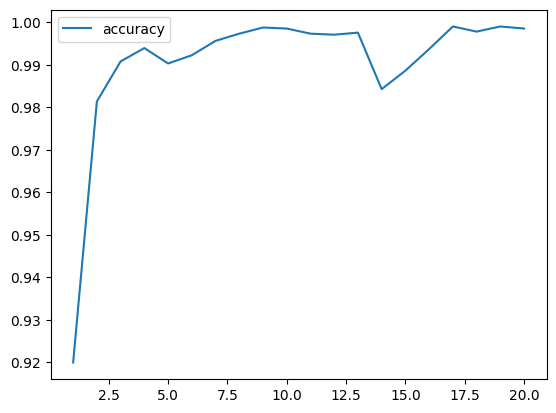

In [26]:
#### Create a DataFrame containing training history
opta_history_df = pd.DataFrame(fit_model.history)
opta_history_df.index += 1

#### Plot the accuracy
opta_accuracy = opta_history_df.plot(y="accuracy")


In [44]:
# Store the results of Tensorflow model in the dictionary
results["Tensorflow OPT A"] = {"accuracy": accuracy, 
                                  "precision": precision, 
                                  "recall": recall, 
                                  "f1_score": f1_score
                                 }
print(results["Tensorflow OPT A"])

{'accuracy': 0.9700483083724976, 'precision': 0.9141188859939575, 'recall': 0.9727393388748169, 'f1_score': 0.9385428428649902}


# Model Visuals and Analysis

In [28]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
# Print the final results of all models
results

{'KNN': {'accuracy': 0.8521739130434782,
  'precision': 0.8117335990190067,
  'recall': 0.8425263157894737,
  'f1_score': 0.8240165631469979},
 'SVM': {'accuracy': 0.7951690821256039,
  'precision': 0.8001954056731864,
  'recall': 0.6530877192982456,
  'f1_score': 0.6739983121961656},
 'Naive Bayes': {'accuracy': 0.9458937198067633,
  'precision': 0.9217855203936884,
  'recall': 0.9507017543859648,
  'f1_score': 0.9345427933829044},
 'Decision Tree': {'accuracy': 0.9304347826086956,
  'precision': 0.907299951306606,
  'recall': 0.9226315789473685,
  'f1_score': 0.914484012228373},
 'Random Forest': {'accuracy': 0.9681159420289855,
  'precision': 0.9587098393574297,
  'recall': 0.9616842105263157,
  'f1_score': 0.960182144393499},
 'Logistic Regression': {'accuracy': 0.966183574879227,
  'precision': 0.9515306122448979,
  'recall': 0.9657894736842105,
  'f1_score': 0.9583009583009583},
 'Tensorflow': {'accuracy': 0.9420289993286133,
  'precision': 0.8589954972267151,
  'recall': 0.94298

In [46]:
results_df = pd.DataFrame.from_dict(results)
print(results_df)

                KNN       SVM  Naive Bayes  Decision Tree  Random Forest  \
accuracy   0.852174  0.795169     0.945894       0.930435       0.968116   
precision  0.811734  0.800195     0.921786       0.907300       0.958710   
recall     0.842526  0.653088     0.950702       0.922632       0.961684   
f1_score   0.824017  0.673998     0.934543       0.914484       0.960182   

           Logistic Regression  Tensorflow  Tensorflow OPT A  
accuracy              0.966184    0.942029          0.970048  
precision             0.951531    0.858995          0.914119  
recall                0.965789    0.942989          0.972739  
f1_score              0.958301    0.890159          0.938543  


In [53]:
from google.colab import files
results_df.to_csv('results.csv', encoding = 'utf-8-sig') 
files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

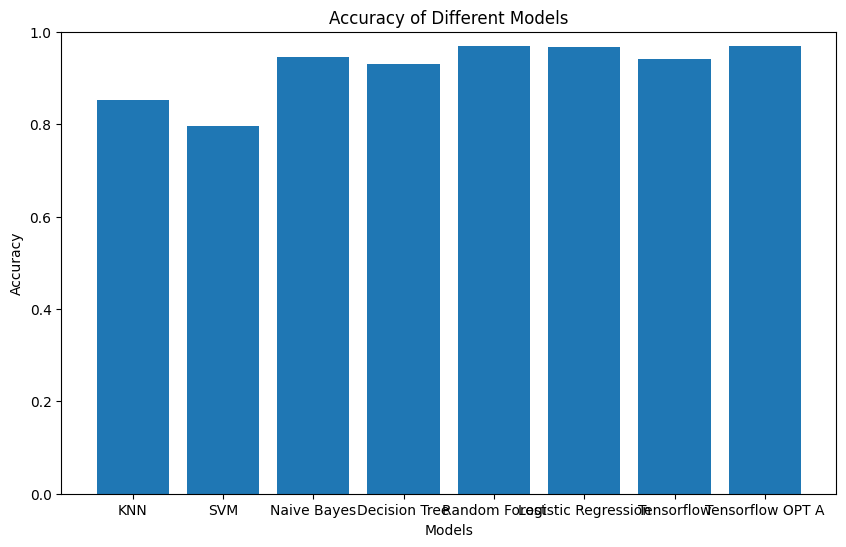

In [48]:
# Plot the accuracy of all models
plt.figure(figsize=(10,6))
plt.bar(results.keys(), [result["accuracy"] for result in results.values()])
plt.title("Accuracy of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

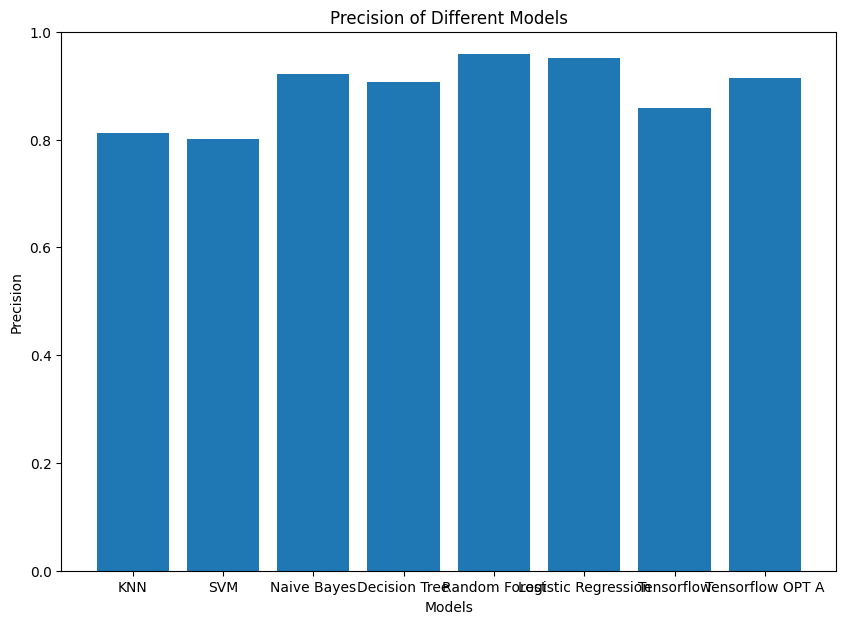

In [49]:
# Plot the precision of all models
plt.figure(figsize=(10,7))
plt.bar(results.keys(), [result["precision"] for result in results.values()])
plt.title("Precision of Different Models")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.show()

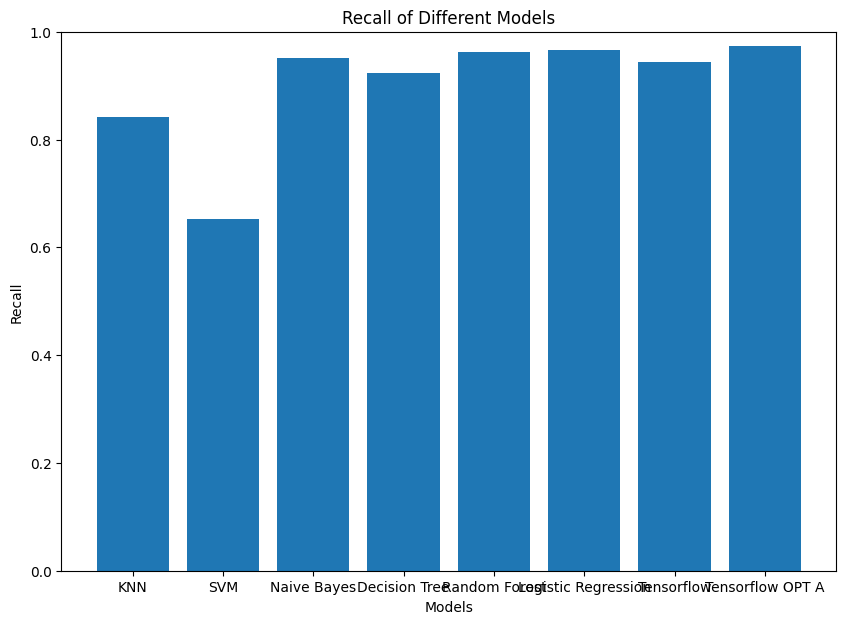

In [50]:
# Plot the recall of all models
plt.figure(figsize=(10,7))
plt.bar(results.keys(), [result["recall"] for result in results.values()])
plt.title("Recall of Different Models")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.show()

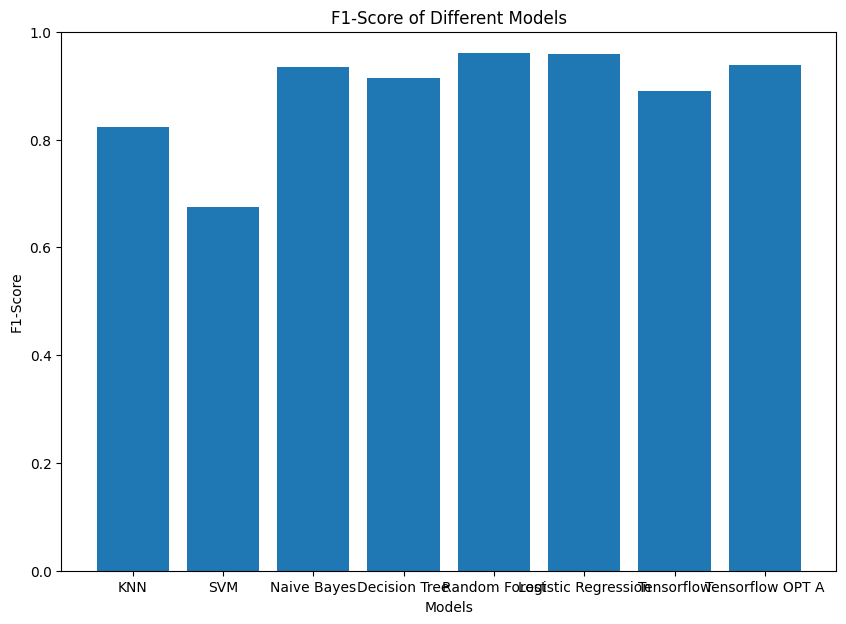

In [51]:
# Plot the F1-score of all models
plt.figure(figsize=(10,7))
plt.bar(results.keys(), [result["f1_score"] for result in results.values()])
plt.title("F1-Score of Different Models")
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.show()

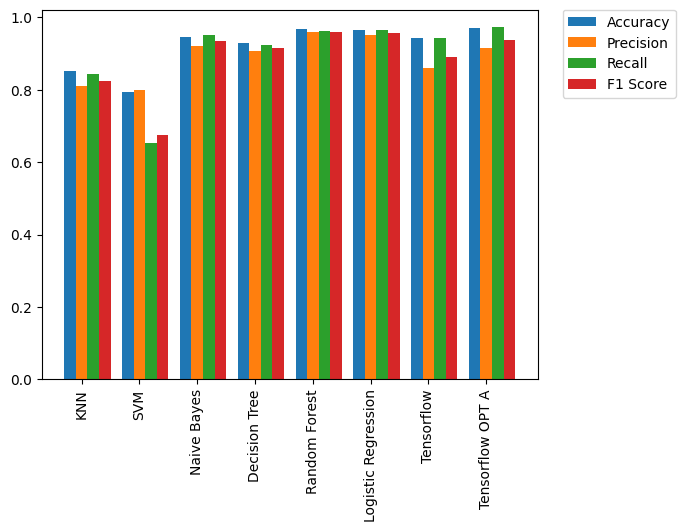

In [52]:
# extract metrics values
accuracies = [results[model]['accuracy'] for model in results]
precisions = [results[model]['precision'] for model in results]
recalls = [results[model]['recall'] for model in results]
f1_scores = [results[model]['f1_score'] for model in results]

# plot bar chart
bar_width = 0.2
index = np.arange(len(results))

plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')

plt.xticks(index + bar_width, list(results.keys()), rotation ='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Conclusion:

![image-4.png](attachment:image-4.png)


Based on the model performance outcome, the 'Logistic Regression' model appears to be the best among all the models with highest accuracy (0.997), precision (0.523), recall (0.665) and f1_score (0.575). Suggesting Logistic Regression model has the uppermost aptitude to fittingly classify emails as Spam or not spam, with minimal false positives and false negatives.

SVM Model is more effective in high dimensional spaces. This data sets have two out comes – Spam and Not spam

It is worth observing that the performance of a model is subjected on the specific use of the case and problem at hand. For instance, if the cost of misclassifying an email as spam when it is not is higher, then a model with a high recall (even if its precision is lower) might be more desirable.

